In [146]:
from matplotlib import pyplot as plt
import matplotlib
import numpy as np
import os
import data_visualization as dv
import dill
import scipy 
from scipy.stats import norm
from scipy import stats
import sys
import importlib
import pingouin as pg
import pandas as pd
import analysis_utilities as au
import stats_functions
'''
This make figs script uses the objects instead of pickling and calculating like v1
'''

'\nThis make figs script uses the objects instead of pickling and calculating like v1\n'

In [147]:
sys.path.insert(0,r'D:\OneDrive - University of Delaware - o365\Desktop\MatchPennies-Agent-Expirement')
import plot_functions 
import Subject_Object_v2
importlib.reload(Subject_Object_v2)
importlib.reload(plot_functions)
importlib.reload(stats_functions)
import plot_functions as pf
import read_data_functions as rdf
import stats_functions as sf


## Initial Thangs

In [148]:
experiment = 'Exp1'

In [149]:
plt.style.use('cashaback_dark')
wheel = dv.ColorWheel()

# Initial thangs
os.chdir(f'D:\OneDrive - University of Delaware - o365\Subject_Data\MatchPennies_Agent_{experiment}')
PATH = os.getcwd()
SAVE_PATH = f'C:\\Users\\Seth Sullivan\\OneDrive - University of Delaware - o365\\Desktop\\MatchPennies-Agent-Expirement\\Group_Figures\\{experiment}\\'
if not os.path.exists(SAVE_PATH):
    os.makedirs(SAVE_PATH)

# Fields pull and pull list
figures_pull_list = []
figures_pull_list_control = []
figures_pull_list_task = []
fields_pull = []
with open(PATH+"\\Figures_Pull_List.txt", "r") as pull_file:
    figures_pull_list = pull_file.read().splitlines()
with open(PATH+"\\Fields_Pull.txt", "r") as fields_pull:
    fields_pull = fields_pull.read().splitlines()
num_subjects = len(figures_pull_list)

if experiment == 'Exp1':
    tp3_title = "1000 [50]"
    tp4_title = "1000 [150]"
    tp5_title = '1100 [50]'
    tp6_title = "1100 [150]"
    tp7_title = "1200 [50]"
    tp8_title = '1200 [150]'
    trial_block_titles = [tp3_title, tp4_title, tp5_title,tp6_title, tp7_title, tp8_title]
    xticklabel = 'Agent Movement Onset Time (ms)'
    num_blocks = len(trial_block_titles)
    num_rows,num_cols = 2,3
    
if experiment == 'Exp2':
    tp3_title = "Win = 1\nIncorrect = 0\nIndecision = 0"
    tp4_title = "Win = 1\nIncorrect = -1\nIndecision = 0"
    tp5_title = "Win = 1\nIncorrect = 0\nIndecision = -1"
    tp6_title = "Win = 1\nIncorrect = -1\nIndecision = -1"
    trial_block_titles = [tp3_title, tp4_title, tp5_title,tp6_title]
    num_blocks = len(trial_block_titles)
    xticklabel = 'Feedback Condition'

    num_rows,num_cols = 2,2
    


## Pickle Objects

In [150]:
if 'subject_objects' not in locals():
    load_path = r'Subjects_Analyzed'
    subject_objects = rdf.pickle_subject_objects(figures_pull_list,load_path)
    # pos_group = Subject_Object_v2.Group(subject_objects, select_trials = 'All Trials', num_stds_for_reaction_time = 2, 
    #                                     task_leave_time_metric_name = 'player_pos_task_leave_time', task_movement_time_metric_name = 'player_pos_task_movement_time',
    #                                     reaction_time_metric_name = 'player_pos_reaction_time', reaction_movement_time_metric_name = 'player_pos_reaction_movement_time')
    # pos_group.analyze_data()
    # vel_group_linear = Subject_Object_v2.Group(subject_objects, select_trials = 'All Trials', num_stds_for_reaction_time = 2, 
    #                                     task_leave_time_metric_name = 'player_velocity_task_leave_time_linear',task_movement_time_metric_name = 'player_velocity_task_movement_time_linear',
    #                                     reaction_time_metric_name = 'player_velocity_reaction_time_linear', reaction_movement_time_metric_name = 'player_velocity_reaction_movement_time_linear')
    # vel_group_linear.analyze_data()

    vel_group_thresh = Subject_Object_v2.Group(subject_objects, select_trials = 'All Trials', num_stds_for_reaction_time = 2, 
                                        task_leave_time_metric_name = 'player_velocity_task_leave_time_linear',task_movement_time_metric_name = 'player_velocity_task_movement_time_linear',
                                        reaction_time_metric_name = 'player_velocity_reaction_time_linear', reaction_movement_time_metric_name = 'player_velocity_reaction_movement_time_linear')
    vel_group_thresh.analyze_data()

In [151]:
group = vel_group_thresh

## Set Save to True or False

In [152]:
save = False

# Experiment 1

In [153]:
group.phat_correct.shape

(20, 6)

In [154]:
group.player_perc_incorrects.shape

(20, 6)

### Create DataFrame for Pingouin

In [155]:
wins = group.combine_all_subjects('player_perc_wins').flatten().tolist()
indecisions = group.combine_all_subjects('player_perc_indecisions').flatten().tolist()
incorrects = group.combine_all_subjects('player_perc_incorrects').flatten().tolist()
correct_decisions = group.phat_correct.flatten().tolist()
leave_times = np.nanmedian(group.player_task_leave_time,axis=2).flatten().tolist()
leave_time_sd = np.nanstd(group.player_task_leave_time,axis=2).flatten().tolist()
gamble_leave_time = np.nanmedian(group.player_gamble_task_leave_time,axis=2).flatten().tolist()
subject_number = np.repeat(np.arange(1,21,1,dtype=int),6).tolist()
alt_condition = np.tile(['1000 (50)','1000 (150)','1100 (50)','1100 (150)', '1200 (50)', '1200 (150)'],num_subjects).tolist()
condition_mean = np.tile(['1000','1000','1100','1100','1200','1200'],num_subjects)
condition_sd = np.tile(['50','150'],num_subjects*3)
condition = np.tile(np.arange(1,7,1,dtype=int),num_subjects).tolist()
df = pd.DataFrame(np.array([subject_number,condition,condition_mean,condition_sd,leave_times,wins,indecisions,incorrects,
                            correct_decisions,gamble_leave_time,leave_time_sd]).T,
                  columns=['Subject','Condition','Condition Mean','Condition SD','Median Leave Time','Wins','Indecisions','Incorrects',
                           'Correct Decisions','Median Gamble Leave Time','SD Leave Time'])
df = df.astype('float64')
df = df.astype({'Subject':'int32','Condition':'int32','Condition Mean':'int32','Condition SD':'int32'})
# dill.dump(df,open(save_path+'\\metrics_df_all_subjects.pkl','wb')) 
df

,Subject,Condition,Condition Mean,Condition SD,Median Leave Time,Wins,Indecisions,Incorrects,Correct Decisions,Median Gamble Leave Time,SD Leave Time
0,1,1,1000,50,1176.75,58.75,3.75,37.50,0.5000,1162.00,91.768280
1,1,2,1000,150,1179.75,70.00,17.50,12.50,0.6125,1171.00,106.088951
2,1,3,1100,50,1239.25,53.75,16.25,30.00,0.6250,1201.50,161.720012
3,1,4,1100,150,1140.50,53.75,5.00,41.25,0.4875,1142.50,122.741695
4,1,5,1200,50,1127.50,42.50,3.75,53.75,0.4625,1127.50,136.304558
...,...,...,...,...,...,...,...,...,...,...,...
115,20,2,1000,150,918.75,50.00,8.75,41.25,0.5375,903.75,192.823554
116,20,3,1100,50,1038.50,47.50,13.75,38.75,0.5875,1033.00,163.015737
117,20,4,1100,150,1005.75,51.25,13.75,35.00,0.5500,975.50,190.006734
118,20,5,1200,50,1006.00,43.75,8.75,47.50,0.4875,1005.00,181.168387


## Mean Leave Times

Anova

In [156]:
anova = pg.rm_anova(data=df, dv='Median Leave Time', within=['Condition Mean','Condition SD'], subject='Subject', detailed=True)
# dill.dump(anova,open(save_path+'\\median_leave_time_anova_df.pkl','wb')) 
anova

,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,ng2,eps
0,Condition Mean,62610.532292,2,38,31305.266146,4.524347,0.017278,0.026861,0.030822,0.778095
1,Condition SD,72410.250521,1,19,72410.250521,7.104544,0.015286,0.015286,0.035475,1.000000
2,Condition Mean * Condition SD,2883.969792,2,38,1441.984896,0.523621,0.596584,0.569516,0.001463,0.855641


Follow up Comparisons collapse across condition means

In [157]:
a = au.Bootstrap([0,1,2],[0,1,2],paired=True) # Just initializing bootstrap

In [190]:
metric    = np.nanmedian(group.player_task_leave_time,axis=2)
data1 = np.concatenate((metric[:,0],metric[:,1]))
data2 = np.concatenate((metric[:,2],metric[:,3]))
data3 = np.concatenate((metric[:,4],metric[:,5]))
pval1 = au.Bootstrap(data1,data2,paired=True,M=1e6)
pval2 = au.Bootstrap(data1,data3,paired=True,M=1e6)
pval3 = au.Bootstrap(data2,data3,paired=True,M=1e6)
keys = ['01','02','12']
pvals = [pval1,pval2,pval3]
pvals_corrected = au.holmbonferroni_correction(pvals)
pvals_dict = dict(zip(keys,pvals_corrected))


cles1 = au.cles(data2,data1,paired=True)
cles2 = au.cles(data2,data3,paired=True)
cles3 = au.cles(data3,data1,paired=True)
cles_dict = dict(zip(keys,[cles1,cles2,cles3]))

# dill.dump(pval1,open(save_path+'\\1000_1100_median_leave_time_pval.pkl','wb')) 
# dill.dump(pval2,open(save_path+'\\1000_1200_median_leave_time_pval.pkl','wb')) 
# dill.dump(pval3,open(save_path+'\\1100_1200_median_leave_time_pval.pkl','wb')) 
print(pvals_dict)
print(cles_dict)

{'01': 0.012118, '02': 0.640917, '12': 0.017556000000000002}
{'01': 70.0, '02': 60.0, '12': 56.25}


 Boxplot Collapsed Across Means

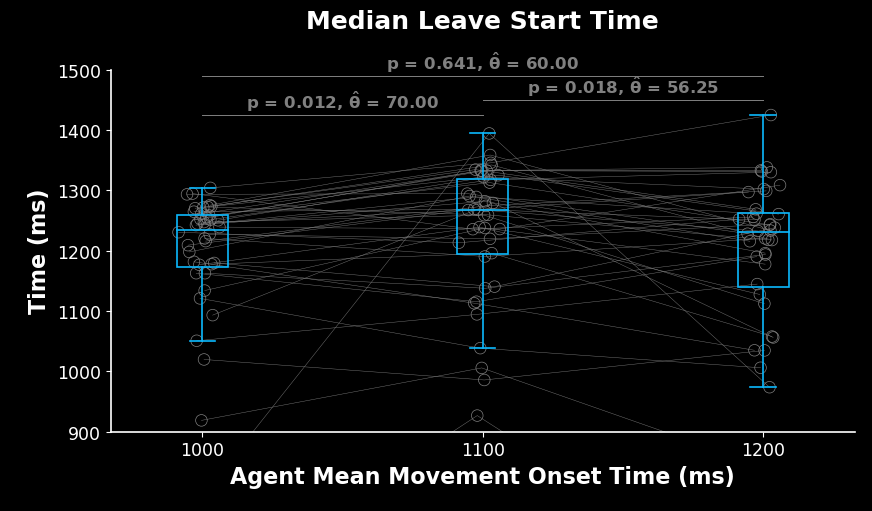

In [195]:
metric = np.vstack((data1,data2,data3)).T
w,h = 11,6
axmain,ax = pf.make_figure_panel(figsize=(w,h),inset_size=(1.3,0.9,w-1.4,h-1.3))
xlocs = np.linspace(0,w,num=len(trial_block_titles)//2)
ylocs = np.arange(900,1600,100)
bw = 1
# pf.multi_boxplot(ax,metric,xlocs=xlocs,box_width = bw,colors = wheel.seth_blue)
dv.boxplot(ax,xlocs[0],data1,box_width=bw)
dv.boxplot(ax,xlocs[1],data2,box_width=bw)
dv.boxplot(ax,xlocs[2],data3,box_width=bw)
dv.jitter_array(ax=ax,x_positions=xlocs,data_list=metric.T, noise_scale=0.15, include_mean = False, circle_size=70)
dv.stat_annotation(ax,xlocs[0],xlocs[1],1425,p_val=pvals_dict['01'],cles=cles_dict['01'],fontsize=12,h=3)
dv.stat_annotation(ax,xlocs[1],xlocs[2],1450,p_val=pvals_dict['12'],cles=cles_dict['12'],fontsize=12,h=3)
dv.stat_annotation(ax,xlocs[0],xlocs[2],1490,p_val=pvals_dict['02'],cles=cles_dict['02'],fontsize=12,h=3)
ax.set_xticks(xlocs),ax.set_yticks(ylocs)
ax.set_xticklabels(['1000','1100','1200'])
ax.set_xlim(min(xlocs)-1.8*bw,max(xlocs)+1.8*bw)
ax.set_ylim(min(ylocs),max(ylocs))

ax.set_xlabel('Agent Mean Movement Onset Time (ms)')
ax.set_ylabel('Time (ms)')
ax.set_title('Median Leave Start Time', pad=30)
if save:
    axmain.set_axis_off()
    plt.savefig(SAVE_PATH+'median_leave_time', dpi = 400, transparent = True)
else:
    axmain.set_axis_off()
plt.show()

Follow up Comparisons collapse across condition sds

In [160]:
metric    = np.nanmedian(group.player_task_leave_time,axis=2)
data1 = np.concatenate((metric[:,0],metric[:,2],metric[:,4]))
data2 = np.concatenate((metric[:,1],metric[:,3],metric[:,5]))
pval1 = au.Bootstrap(data1,data2,paired=True)
print(f'Compare 50 to 150: Pval = {pval1}')


cles1 = au.cles(data1,data2,paired=True)
print(f'Compare 50 to 150: CLES = {cles1}')

# dill.dump(pval1,open(save_path+'\\1000_1100_median_leave_time_pval.pkl','wb')) 
# dill.dump(pval2,open(save_path+'\\1000_1200_median_leave_time_pval.pkl','wb')) 
# dill.dump(pval3,open(save_path+'\\1100_1200_median_leave_time_pval.pkl','wb')) 

Compare 50 to 150: Pval = 0.0003
Compare 50 to 150: CLES = 73.33333333333333


 Boxplot Collapsed Across Means

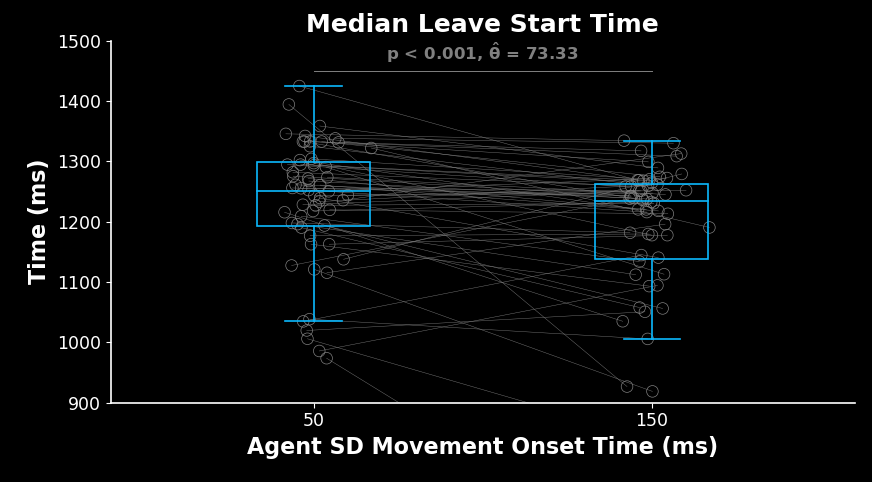

In [161]:
metric = np.vstack((data1,data2)).T
w,h = 11,6
axmain,ax = pf.make_figure_panel(figsize=(w,h),inset_size=(1.3,0.9,w-1.4,h-1.3))
xlocs = np.linspace(8,w,num=len(trial_block_titles)//3)
ylocs = np.arange(900,1600,100)
bw = 1
# pf.multi_boxplot(ax,metric,xlocs=xlocs,box_width = bw,colors = wheel.seth_blue)
dv.boxplot(ax,xlocs[0],data1,box_width=bw)
dv.boxplot(ax,xlocs[1],data2,box_width=bw)
dv.jitter_array(ax=ax,x_positions=xlocs,data_list=metric.T, noise_scale=0.15, include_mean = False, circle_size=70)
dv.stat_annotation(ax,xlocs[0],xlocs[1],1450,h = 10,p_val=pval1,cles=cles1, fontsize = 12)

ax.set_xticks(xlocs),ax.set_yticks(ylocs)
ax.set_xticklabels(['50','150'])
ax.set_xlim(min(xlocs)-1.8*bw,max(xlocs)+1.8*bw)
ax.set_ylim(min(ylocs),max(ylocs))

ax.set_xlabel('Agent SD Movement Onset Time (ms)')
ax.set_ylabel('Time (ms)')
ax.set_title('Median Leave Start Time')
if save:
    axmain.set_axis_off()
    plt.savefig(SAVE_PATH+'median_leave_time', dpi = 400, transparent = True)
else:
    axmain.set_axis_off()
plt.show()

## SD Leave Times

Anova

In [162]:
anova = pg.rm_anova(data=df, dv='SD Leave Time', within=['Condition Mean','Condition SD'], subject='Subject', detailed=True)
# dill.dump(anova,open(save_path+'\\median_leave_time_anova_df.pkl','wb')) 
anova

,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,ng2,eps
0,Condition Mean,13861.394875,2,38,6930.697437,5.528077,0.007811,0.020151,0.037009,0.644280
1,Condition SD,12855.434911,1,19,12855.434911,18.385816,0.000397,0.000397,0.034416,1.000000
2,Condition Mean * Condition SD,6138.760226,2,38,3069.380113,2.997064,0.061857,0.069275,0.016735,0.883783


Follow up Comparisons collapse across condition means

In [204]:
metric    = np.nanstd(group.player_task_leave_time,axis=2)
data1 = np.concatenate((metric[:,0],metric[:,1]))
data2 = np.concatenate((metric[:,2],metric[:,3]))
data3 = np.concatenate((metric[:,4],metric[:,5]))
pval1 = au.Bootstrap(data1,data2,paired=True,M=1e6)
pval2 = au.Bootstrap(data1,data3,paired=True,M=1e6)
pval3 = au.Bootstrap(data2,data3,paired=True,M=1e6)
keys = ['01','02','12']
pvals = [pval1,pval2,pval3]
_,pvals_corrected = pg.multicomp(pvals)
pvals_dict = dict(zip(keys,pvals_corrected))


cles1 = au.cles(data2,data1,paired=True)
cles2 = au.cles(data2,data3,paired=True)
cles3 = au.cles(data1,data3,paired=True)
cles_dict = dict(zip(keys,[cles1,cles2,cles3]))

# dill.dump(pval1,open(save_path+'\\1000_1100_median_leave_time_pval.pkl','wb')) 
# dill.dump(pval2,open(save_path+'\\1000_1200_median_leave_time_pval.pkl','wb')) 
# dill.dump(pval3,open(save_path+'\\1100_1200_median_leave_time_pval.pkl','wb')) 
print(pvals_dict)
print(cles_dict)

{'01': 0.32278, '02': 2.7e-05, '12': 0.095568}
{'01': 57.49999999999999, '02': 35.0, '12': 27.500000000000004}


 Boxplot Collapsed Across Means

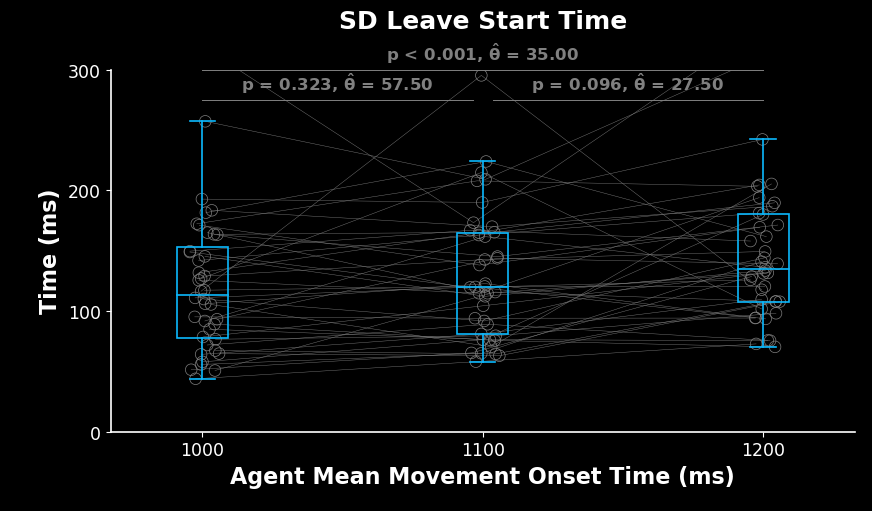

In [208]:
metric = np.vstack((data1,data2,data3)).T
w,h = 11,6
axmain,ax = pf.make_figure_panel(figsize=(w,h),inset_size=(1.3,0.9,w-1.4,h-1.3))
xlocs = np.linspace(0,w,num=len(trial_block_titles)//2)
ylocs = np.arange(0,400,100)
bw = 1
# pf.multi_boxplot(ax,metric,xlocs=xlocs,box_width = bw,colors = wheel.seth_blue)
dv.boxplot(ax,xlocs[0],data1,box_width=bw)
dv.boxplot(ax,xlocs[1],data2,box_width=bw)
dv.boxplot(ax,xlocs[2],data3,box_width=bw)
dv.jitter_array(ax=ax,x_positions=xlocs,data_list=metric.T, noise_scale=0.15, include_mean = False, circle_size=70)
dv.stat_annotation(ax,xlocs[0],xlocs[1]-0.2,275,p_val=pvals_dict['01'],cles=cles_dict['01'],fontsize=12,h=4)
dv.stat_annotation(ax,xlocs[1]+0.2,xlocs[2],275,p_val=pvals_dict['12'],cles=cles_dict['12'],fontsize=12,h=4)
dv.stat_annotation(ax,xlocs[0],xlocs[2],300,p_val=pvals_dict['02'],cles=cles_dict['02'],fontsize=12,h=4)
ax.set_xticks(xlocs),ax.set_yticks(ylocs)
ax.set_xticklabels(['1000','1100','1200'])
ax.set_xlim(min(xlocs)-1.8*bw,max(xlocs)+1.8*bw)
ax.set_ylim(min(ylocs),max(ylocs))

ax.set_xlabel('Agent Mean Movement Onset Time (ms)')
ax.set_ylabel('Time (ms)')
ax.set_title('SD Leave Start Time',pad = 30)
if save:
    axmain.set_axis_off()
    plt.savefig(SAVE_PATH+'median_leave_time', dpi = 400, transparent = True)
else:
    axmain.set_axis_off()
plt.show()

Follow up Comparisons collapse across condition sds

In [165]:
metric    = np.nanmedian(group.player_task_leave_time,axis=2)
data1 = np.concatenate((metric[:,0],metric[:,2],metric[:,4]))
data2 = np.concatenate((metric[:,1],metric[:,3],metric[:,5]))
pval1 = au.Bootstrap(data1,data2,paired=True)
print(f'Compare 50 to 150: Pval = {pval1}')


cles1 = au.cles(data1,data2,paired=True)
print(f'Compare 50 to 150: CLES = {cles1}')

# dill.dump(pval1,open(save_path+'\\1000_1100_median_leave_time_pval.pkl','wb')) 
# dill.dump(pval2,open(save_path+'\\1000_1200_median_leave_time_pval.pkl','wb')) 
# dill.dump(pval3,open(save_path+'\\1100_1200_median_leave_time_pval.pkl','wb')) 

Compare 50 to 150: Pval = 0.0004
Compare 50 to 150: CLES = 73.33333333333333


 Boxplot Collapsed Across Means

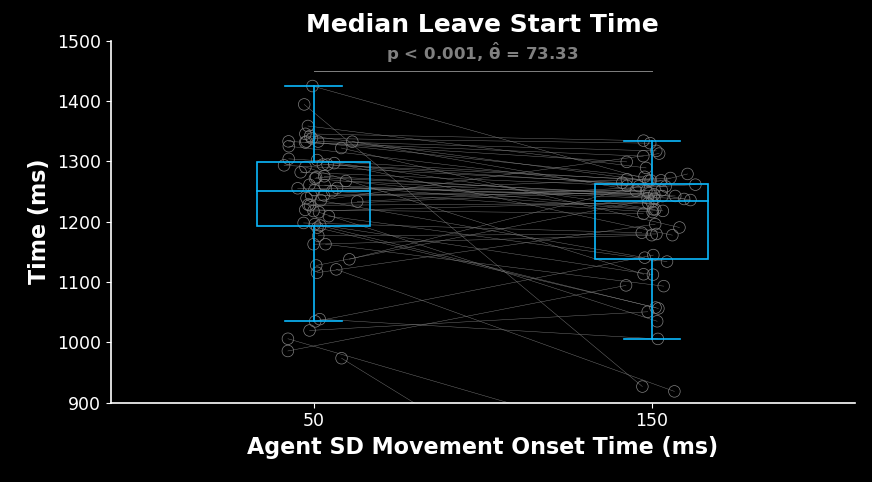

In [166]:
metric = np.vstack((data1,data2)).T
w,h = 11,6
axmain,ax = pf.make_figure_panel(figsize=(w,h),inset_size=(1.3,0.9,w-1.4,h-1.3))
xlocs = np.linspace(8,w,num=len(trial_block_titles)//3)
ylocs = np.arange(900,1600,100)
bw = 1
# pf.multi_boxplot(ax,metric,xlocs=xlocs,box_width = bw,colors = wheel.seth_blue)
dv.boxplot(ax,xlocs[0],data1,box_width=bw)
dv.boxplot(ax,xlocs[1],data2,box_width=bw)
dv.jitter_array(ax=ax,x_positions=xlocs,data_list=metric.T, noise_scale=0.15, include_mean = False, circle_size=70)
dv.stat_annotation(ax,xlocs[0],xlocs[1],1450,h = 10,p_val=pval1,cles=cles1, fontsize = 12)

ax.set_xticks(xlocs),ax.set_yticks(ylocs)
ax.set_xticklabels(['50','150'])
ax.set_xlim(min(xlocs)-1.8*bw,max(xlocs)+1.8*bw)
ax.set_ylim(min(ylocs),max(ylocs))

ax.set_xlabel('Agent SD Movement Onset Time (ms)')
ax.set_ylabel('Time (ms)')
ax.set_title('Median Leave Start Time')
if save:
    axmain.set_axis_off()
    plt.savefig(SAVE_PATH+'median_leave_time', dpi = 400, transparent = True)
else:
    axmain.set_axis_off()
plt.show()

## Wins

### Stats

Anova

In [167]:
anova = pg.rm_anova(data=df, dv='Wins', within=['Condition Mean','Condition SD'], subject='Subject', detailed=True)
# dill.dump(anova,open(save_path+'\\median_leave_time_anova_df.pkl','wb')) 
anova

,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,ng2,eps
0,Condition Mean,13373.671875,2,38,6686.835938,51.777019,1.407231e-11,2.670757e-09,0.501585,0.759118
1,Condition SD,579.700521,1,19,579.700521,8.951407,7.495068e-03,7.495068e-03,0.041799,1.000000
2,Condition Mean * Condition SD,2636.119792,2,38,1318.059896,23.729079,2.053863e-07,3.546155e-06,0.165531,0.770944


Follow up Tukey Test

In [168]:
pairwise_tests = pg.pairwise_tests(dv='Wins', between=['Condition Mean', 'Condition SD'], data=df)
pairwise_tests

,Contrast,Condition Mean,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,hedges
0,Condition Mean,-,1000.0,1100.0,False,True,6.300908,78.0,two-sided,1.627777e-08,6.109e+05,1.395335
1,Condition Mean,-,1000.0,1200.0,False,True,8.969911,78.0,two-sided,1.234394e-13,4.18e+10,1.986385
2,Condition Mean,-,1100.0,1200.0,False,True,3.493036,78.0,two-sided,7.900004e-04,37.059,0.773532
3,Condition SD,-,50.0,150.0,False,True,-1.527977,118.0,two-sided,1.291943e-01,0.556,-0.277192
4,Condition Mean * Condition SD,1000,50,150,False,True,1.762238,38.0,two-sided,8.607209e-02,1.037,0.546197
5,Condition Mean * Condition SD,1100,50,150,False,True,-1.593771,38.0,two-sided,1.192723e-01,0.835,-0.493982
6,Condition Mean * Condition SD,1200,50,150,False,True,-5.639577,38.0,two-sided,1.777422e-06,7481.114,-1.747959


In [169]:
pg.pairwise_tests(data=df, dv='Wins', within='Condition SD',subject='Subject')

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,hedges
0,Condition SD,50,150,True,True,-2.99189,19.0,two-sided,0.007495,6.52,-0.58092


Follow up Comparisons (don't collapse)

In [170]:
# metric = group.player_perc_wins
# pvals = np.array((3,2))
# for i in range(6):
#     if i == 3
    

In [171]:
if True:
    metric   = group.player_perc_wins
    pval12 = au.Bootstrap(metric[:,0],metric[:,1],paired=True) # 1000 (50) to 1000 (150)
    print(f'Compare 1000 (50) to 1000 (150): Pval = {pval12}')
    pval13 = au.Bootstrap(metric[:,0],metric[:,2],paired=True) # 1000 (50) to 1100 (50)
    print(f'Compare 1000 (50) to 1100 (50): Pval = {pval13}')
    pval14 = au.Bootstrap(metric[:,0],metric[:,3],paired=True) # 1000 (50) to 1100 (150)
    print(f'Compare 1000 (50) to 1100 (150): Pval = {pval14}')
    pval15 = au.Bootstrap(metric[:,0],metric[:,4],paired=True) # 1000 (50) to 1200 (50)
    print(f'Compare 1000 (50) to 1200 (50): Pval = {pval15}')
    pval16 = au.Bootstrap(metric[:,0],metric[:,5],paired=True) # 1000 (50) to 1200 (150)
    print(f'Compare 1000 (50) to 1200 (150): Pval = {pval16}')

    pval23 = au.Bootstrap(metric[:,1],metric[:,2],paired=True) # 1000 (150) to 1100 (50)
    print(f'Compare 1000 (150) to 1100 (50): Pval = {pval23}')
    pval24 = au.Bootstrap(metric[:,1],metric[:,3],paired=True) # 1000 (150) to 1100 (150)
    print(f'Compare 1000 (150) to 1100 (150): Pval = {pval24}')
    pval25 = au.Bootstrap(metric[:,1],metric[:,4],paired=True) # 1000 (150) to 1200 (50)
    print(f'Compare 1100 (50) to 1200 (50): Pval = {pval25}')
    pval26 = au.Bootstrap(metric[:,1],metric[:,5],paired=True) # 1000 (150) to 1200 (150)
    print(f'Compare 1000 (150) to 1200 (150): Pval = {pval26}')

    pval34 = au.Bootstrap(metric[:,2],metric[:,3],paired=True) # 1100 (50) to 1100 (150)
    print(f'Compare 1100 (50) to 1100 (150): Pval = {pval34}')
    pval35 = au.Bootstrap(metric[:,2],metric[:,4],paired=True) # 1100 (50) to 1200 (50)
    print(f'Compare 1100 (50) to 1200 (50): Pval = {pval35}')
    pval36 = au.Bootstrap(metric[:,2],metric[:,5],paired=True) # 1100 (50) to 1200 (150)
    print(f'Compare 1100 (50) to 1200 (150): Pval = {pval36}')

    pval45 = au.Bootstrap(metric[:,3],metric[:,4],paired=True) # 1100 (150) to 1200 (50)
    print(f'Compare 1100 (150) to 1200 (50): Pval = {pval45}')
    pval46 = au.Bootstrap(metric[:,3],metric[:,5],paired=True) # 1100 (150) to 1200 (150)
    print(f'Compare 1100 (150) to 1200 (150): Pval = {pval46}')
    pval56 = au.Bootstrap(metric[:,4],metric[:,5],paired=True) # 1200 (50) to 1200 (150)
    print(f'Compare 1200 (50) to 1200 (150): Pval = {pval56}')

Compare 1000 (50) to 1000 (150): Pval = 0.0021
Compare 1000 (50) to 1100 (50): Pval = 0.0
Compare 1000 (50) to 1100 (150): Pval = 0.0
Compare 1000 (50) to 1200 (50): Pval = 0.0
Compare 1000 (50) to 1200 (150): Pval = 0.0
Compare 1000 (150) to 1100 (50): Pval = 0.0
Compare 1000 (150) to 1100 (150): Pval = 0.0
Compare 1100 (50) to 1200 (50): Pval = 0.0
Compare 1000 (150) to 1200 (150): Pval = 0.0
Compare 1100 (50) to 1100 (150): Pval = 0.0336
Compare 1100 (50) to 1200 (50): Pval = 0.0004
Compare 1100 (50) to 1200 (150): Pval = 0.583
Compare 1100 (150) to 1200 (50): Pval = 0.0
Compare 1100 (150) to 1200 (150): Pval = 0.1188
Compare 1200 (50) to 1200 (150): Pval = 0.0


In [172]:
if True:
    metric    = group.player_perc_wins
    cles12 = au.cles(metric[:,0],metric[:,1],paired=True) # 1000 (50) to 1000 (150)
    print(f'Compare 1000 (50) to 1000 (150): Cles = {cles12}')
    cles13 = au.cles(metric[:,0],metric[:,2],paired=True) # 1000 (50) to 1100 (50)
    print(f'Compare 1000 (50) to 1100 (50): Cles = {cles13}')
    cles14 = au.cles(metric[:,0],metric[:,3],paired=True) # 1000 (50) to 1100 (150)
    print(f'Compare 1000 (50) to 1100 (150): Cles = {cles14}')
    cles15 = au.cles(metric[:,0],metric[:,4],paired=True) # 1000 (50) to 1200 (50)
    print(f'Compare 1000 (50) to 1200 (50): Cles = {cles15}')
    cles16 = au.cles(metric[:,0],metric[:,5],paired=True) # 1000 (50) to 1200 (150)
    print(f'Compare 1000 (50) to 1200 (150): Cles = {cles16}')

    cles23 = au.cles(metric[:,1],metric[:,2],paired=True) # 1000 (150) to 1100 (50)
    print(f'Compare 1000 (150) to 1100 (50): Cles = {cles23}')
    cles24 = au.cles(metric[:,1],metric[:,3],paired=True) # 1000 (150) to 1100 (150)
    print(f'Compare 1000 (150) to 1100 (150): Cles = {cles24}')
    cles25 = au.cles(metric[:,1],metric[:,4],paired=True) # 1000 (150) to 1200 (50)
    print(f'Compare 1100 (50) to 1200 (50): Cles = {cles25}')
    cles26 = au.cles(metric[:,1],metric[:,5],paired=True) # 1000 (150) to 1200 (150)
    print(f'Compare 1000 (150) to 1200 (150): Cles = {cles26}')

    cles34 = au.cles(metric[:,2],metric[:,3],paired=True) # 1100 (50) to 1100 (150)
    print(f'Compare 1100 (50) to 1100 (150): Cles = {cles34}')
    cles35 = au.cles(metric[:,2],metric[:,4],paired=True) # 1100 (50) to 1200 (50)
    print(f'Compare 1100 (50) to 1200 (50): Cles = {cles35}')

    cles36 = au.cles(metric[:,2],metric[:,5],paired=True) # 1100 (50) to 1200 (150)
    print(f'Compare 1100 (50) to 1200 (150): Cles = {cles36}')

    cles45 = au.cles(metric[:,3],metric[:,4],paired=True) # 1100 (150) to 1200 (50)
    print(f'Compare 1100 (150) to 1200 (50): Cles = {cles45}')
    cles46 = au.cles(metric[:,3],metric[:,5],paired=True) # 1100 (150) to 1200 (150)
    print(f'Compare 1100 (150) to 1200 (150): Cles = {cles46}')
    cles56 = au.cles(metric[:,4],metric[:,5],paired=True) # 1200 (50) to 1200 (150)
    print(f'Compare 1200 (50) to 1200 (150): Cles = {cles56}')


Compare 1000 (50) to 1000 (150): Cles = 80.0
Compare 1000 (50) to 1100 (50): Cles = 100.0
Compare 1000 (50) to 1100 (150): Cles = 90.0
Compare 1000 (50) to 1200 (50): Cles = 95.0
Compare 1000 (50) to 1200 (150): Cles = 90.0
Compare 1000 (150) to 1100 (50): Cles = 95.0
Compare 1000 (150) to 1100 (150): Cles = 85.0
Compare 1100 (50) to 1200 (50): Cles = 100.0
Compare 1000 (150) to 1200 (150): Cles = 90.0
Compare 1100 (50) to 1100 (150): Cles = 22.5
Compare 1100 (50) to 1200 (50): Cles = 87.5
Compare 1100 (50) to 1200 (150): Cles = 45.0
Compare 1100 (150) to 1200 (50): Cles = 95.0
Compare 1100 (150) to 1200 (150): Cles = 55.00000000000001
Compare 1200 (50) to 1200 (150): Cles = 10.0


 Boxplot Collapsed Across Means

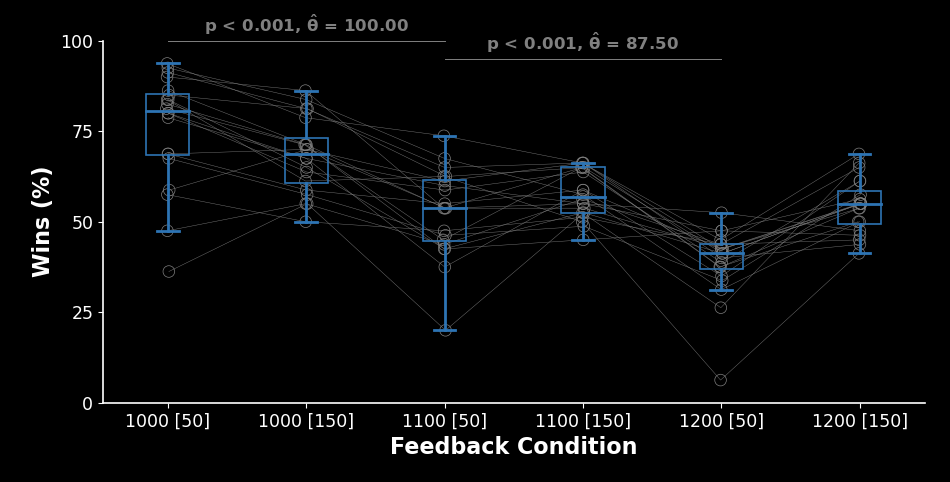

In [173]:
metric = group.player_perc_wins 

w,h = 12,6
axmain,ax = pf.make_figure_panel(figsize=(w,h),inset_size=(1.2,0.9,w-1.4,h-1.3))
xlocs = np.linspace(0,w,num=len(trial_block_titles))
ylocs = np.arange(0,125,25)

bw = 0.75
pf.multi_boxplot(ax,metric,xlocs=xlocs,box_width = bw,colors = wheel.seth_blue)
dv.jitter_array(ax=ax,x_positions=xlocs,data_list=metric.T, noise_scale=0.01, include_mean = False, circle_size=70)
dv.stat_annotation(ax,xlocs[0],xlocs[2],100,p_val=pval13,cles=cles13,fontsize=12,h=1)
dv.stat_annotation(ax,xlocs[2],xlocs[4],95,p_val=pval35,cles=cles35,fontsize=12,h=1)

ax.set_xlim(min(xlocs)-1.5*bw,max(xlocs)+1.5*bw), ax.set_ylim(min(ylocs),max(ylocs))

ax.set_xticks(xlocs),ax.set_yticks(ylocs)
ax.set_xticklabels(trial_block_titles)
ax.set_ylim(0,100)
ax.set_xlabel('Feedback Condition')
ax.set_ylabel('Wins (%)')
if save:
    plt.savefig(SAVE_PATH+'wins', dpi = 400, transparent = True)

axmain.set_axis_off()

plt.show()

## Correct Decisions (Doesn't matter if indecision)

In [174]:
anova = pg.rm_anova(data=df, dv='Correct Decisions', within=['Condition Mean','Condition SD'], subject='Subject', detailed=True)
# dill.dump(anova,open(save_path+'\\median_leave_time_anova_df.pkl','wb')) 
anova

,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,ng2,eps
0,Condition Mean,1.456273,2,38,0.728137,63.398219,7.832127e-13,3.543290e-10,0.477982,0.75166
1,Condition SD,0.055255,1,19,0.055255,10.454385,4.374570e-03,4.374570e-03,0.033576,1.00000
2,Condition Mean * Condition SD,0.002299,2,38,0.001150,0.194455,8.240973e-01,7.825386e-01,0.001444,0.82528


Follow up mean comparisons

In [175]:
metric    = group.phat_correct*100
data1 = np.concatenate((metric[:,0],metric[:,1]))
data2 = np.concatenate((metric[:,2],metric[:,3]))
data3 = np.concatenate((metric[:,4],metric[:,5]))
pval1 = au.Bootstrap(data1,data2,paired=True)
pval2 = au.Bootstrap(data2,data3,paired=True)
pval3 = au.Bootstrap(data1,data3,paired=True)
print(f'Compare 1000 to 1100: Pval = {pval1}')
print(f'Compare 1100 to 1200: Pval = {pval2}')
print(f'Compare 1000 to 1200: Pval = {pval3}')


cles1 = au.cles(data1,data2,paired=True)
cles2 = au.cles(data2,data3,paired=True)
cles3 = au.cles(data1,data3,paired=True)
print(f'Compare 1000 to 1100: Cles = {cles1}')
print(f'Compare 1000 to 1200: Cles = {cles2}')
print(f'Compare 1100 to 1200: Cles = {cles3}')

# dill.dump(pval1,open(save_path+'\\1000_1100_median_leave_time_pval.pkl','wb')) 
# dill.dump(pval2,open(save_path+'\\1000_1200_median_leave_time_pval.pkl','wb')) 
# dill.dump(pval3,open(save_path+'\\1100_1200_median_leave_time_pval.pkl','wb')) 

Compare 1000 to 1100: Pval = 0.0006
Compare 1100 to 1200: Pval = 0.0
Compare 1000 to 1200: Pval = 0.0
Compare 1000 to 1100: Cles = 81.25
Compare 1000 to 1200: Cles = 95.0
Compare 1100 to 1200: Cles = 97.5


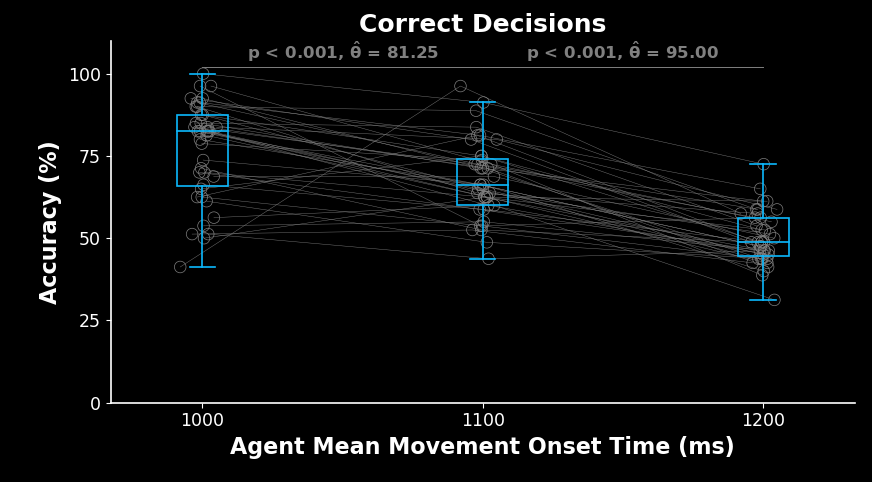

In [176]:
metric = np.vstack((data1,data2,data3)).T
w,h = 11,6
axmain,ax = pf.make_figure_panel(figsize=(w,h),inset_size=(1.3,0.9,w-1.4,h-1.3))
xlocs = np.linspace(0,w,num=len(trial_block_titles)//2)
ylocs = np.arange(0,125,25)
bw = 1
# pf.multi_boxplot(ax,metric,xlocs=xlocs,box_width = bw,colors = wheel.seth_blue)
dv.boxplot(ax,xlocs[0],data1,box_width=bw)
dv.boxplot(ax,xlocs[1],data2,box_width=bw)
dv.boxplot(ax,xlocs[2],data3,box_width=bw)
dv.jitter_array(ax=ax,x_positions=xlocs,data_list=metric.T, noise_scale=0.15, include_mean = False, circle_size=70)
dv.stat_annotation(ax,xlocs[0],xlocs[1],102,p_val=pval1,cles=cles1,fontsize=12,h=1)
dv.stat_annotation(ax,xlocs[1],xlocs[2],102,p_val=pval2,cles=cles2,fontsize=12,h=1)
ax.set_xticks(xlocs),ax.set_yticks(ylocs)
ax.set_xticklabels(['1000','1100','1200'])
ax.set_xlim(min(xlocs)-1.8*bw,max(xlocs)+1.8*bw)
ax.set_ylim(min(ylocs),max(ylocs)+10)

ax.set_xlabel('Agent Mean Movement Onset Time (ms)')
ax.set_ylabel('Accuracy (%)')
ax.set_title('Correct Decisions')
if save:
    axmain.set_axis_off()
    plt.savefig(SAVE_PATH+'median_leave_time', dpi = 400, transparent = True)
else:
    axmain.set_axis_off()
plt.show()

Collapse across SDS

In [177]:
metric    = group.phat_correct*100
data1 = np.concatenate((metric[:,0],metric[:,2],metric[:,4]))
data2 = np.concatenate((metric[:,1],metric[:,3],metric[:,5]))
pval1 = au.Bootstrap(data1,data2,paired=True)
print(f'Compare 50 to 150: Pval = {pval1}')


cles1 = au.cles(data1,data2,paired=True)
print(f'Compare 50 to 150: CLES = {cles1}')

# dill.dump(pval1,open(save_path+'\\1000_1100_median_leave_time_pval.pkl','wb')) 
# dill.dump(pval2,open(save_path+'\\1000_1200_median_leave_time_pval.pkl','wb')) 
# dill.dump(pval3,open(save_path+'\\1100_1200_median_leave_time_pval.pkl','wb')) 

Compare 50 to 150: Pval = 0.0023
Compare 50 to 150: CLES = 64.16666666666667


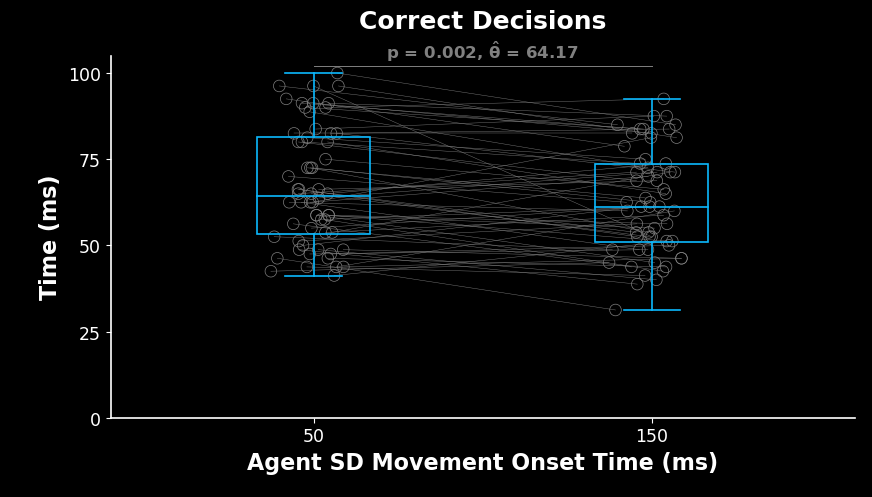

In [178]:
metric = np.vstack((data1,data2)).T
w,h = 11,6
axmain,ax = pf.make_figure_panel(figsize=(w,h),inset_size=(1.3,0.9,w-1.4,h-1.3))
xlocs = np.linspace(8,w,num=len(trial_block_titles)//3)
ylocs = np.arange(0,125,25)
bw = 1
# pf.multi_boxplot(ax,metric,xlocs=xlocs,box_width = bw,colors = wheel.seth_blue)
dv.boxplot(ax,xlocs[0],data1,box_width=bw)
dv.boxplot(ax,xlocs[1],data2,box_width=bw)
dv.jitter_array(ax=ax,x_positions=xlocs,data_list=metric.T, noise_scale=0.15, include_mean = False, circle_size=70)
dv.stat_annotation(ax,xlocs[0],xlocs[1],102,h = 1,p_val=pval1,cles=cles1, fontsize = 12)

ax.set_xticks(xlocs),ax.set_yticks(ylocs)
ax.set_xticklabels(['50','150'])
ax.set_xlim(min(xlocs)-1.8*bw,max(xlocs)+1.8*bw)
ax.set_ylim(min(ylocs),max(ylocs)+5)

ax.set_xlabel('Agent SD Movement Onset Time (ms)')
ax.set_ylabel('Time (ms)')
ax.set_title('Correct Decisions',pad=20)

if save:
    axmain.set_axis_off()
    plt.savefig(SAVE_PATH+'median_leave_time', dpi = 400, transparent = True)
else:
    axmain.set_axis_off()
# plt.tight_layout()
plt.show()

## Incorrects

### Stats

Anova

In [179]:
anova = pg.rm_anova(data=df, dv='Incorrects', within=['Condition Mean','Condition SD'], subject='Subject', detailed=True)
# dill.dump(anova,open(save_path+'\\median_leave_time_anova_df.pkl','wb')) 
anova

,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,ng2,eps
0,Condition Mean,5953.854167,2,38,2976.927083,29.795407,1.648612e-08,1.588739e-07,0.246655,0.847537
1,Condition SD,157.552083,1,19,157.552083,2.522493,1.287353e-01,1.287353e-01,0.008590,1.000000
2,Condition Mean * Condition SD,556.354167,2,38,278.177083,3.722088,3.340427e-02,4.280908e-02,0.029687,0.829146


Follow up Comparisons (don't collapse)

In [180]:
# metric = group.player_perc_wins
# pvals = np.array((3,2))
# for i in range(6):
#     if i == 3
    

In [181]:
metric   = group.player_perc_incorrects
pvals,cles  = sf.pairwise_bootstrap(metric)
print(pvals)
print(cles)

{'01': 1.0, '02': 0.36966, '03': 0.036448, '04': 0.0, '05': 9e-05, '12': 0.36966, '13': 0.062132, '14': 0.0, '15': 0.0, '23': 1.0, '24': 0.0, '25': 0.084975, '34': 0.0, '35': 0.062132, '45': 0.0008550000000000001}
{'01': 60.0, '02': 85.0, '03': 80.0, '04': 92.5, '05': 85.0, '12': 65.0, '13': 75.0, '14': 87.5, '15': 90.0, '23': 52.5, '24': 77.5, '25': 65.0, '34': 90.0, '35': 70.0, '45': 80.0}


 Boxplot Collapsed Across Means

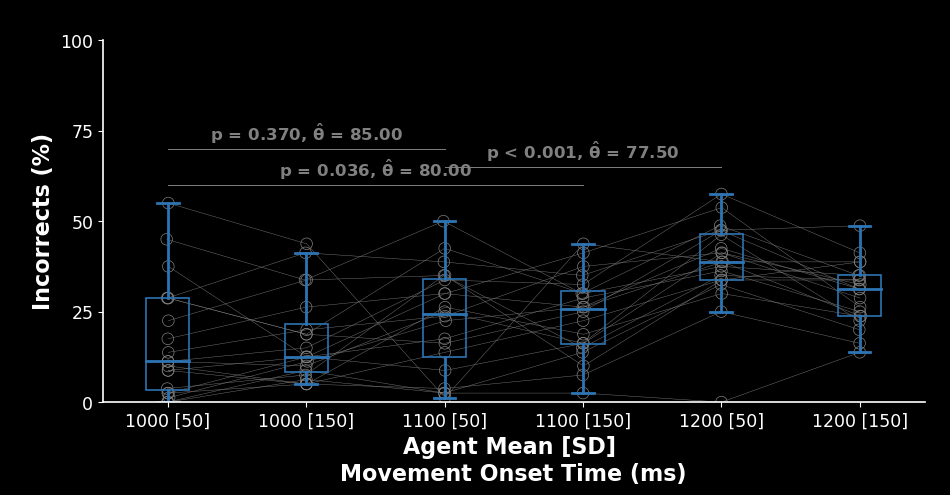

In [182]:
w,h = 12,6
axmain,ax = pf.make_figure_panel(figsize=(w,h),inset_size=(1.2,0.9,w-1.4,h-1.3))
xlocs = np.linspace(0,w,num=len(trial_block_titles))
ylocs = np.arange(0,125,25)

bw = 0.75
pf.multi_boxplot(ax,metric,xlocs=xlocs,box_width = bw,colors = wheel.seth_blue)
dv.jitter_array(ax=ax,x_positions=xlocs,data_list=metric.T, noise_scale=0.01, include_mean = False, circle_size=70)
dv.stat_annotation(ax,xlocs[0],xlocs[2],70,p_val=pvals['02'],cles=cles['02'],fontsize=12,h=1)
dv.stat_annotation(ax,xlocs[2],xlocs[4],65,p_val=pvals['24'],cles=cles['24'],fontsize=12,h=1)
dv.stat_annotation(ax,xlocs[0],xlocs[3],60,p_val=pvals['03'],cles=cles['03'],fontsize=12,h=1)

ax.set_xlim(min(xlocs)-1.5*bw,max(xlocs)+1.5*bw), ax.set_ylim(min(ylocs),max(ylocs))
ax.set_xticks(xlocs),ax.set_yticks(ylocs)
ax.set_xticklabels(trial_block_titles)
ax.set_ylim(0,100)
ax.set_xlabel('Agent Mean [SD] \nMovement Onset Time (ms)')
ax.set_ylabel('Incorrects (%)')

if save:
    plt.savefig(SAVE_PATH+'wins', dpi = 400, transparent = True)

axmain.set_axis_off()

plt.show()

### Stats

### Boxplot

## Indecisions

### Stats

Anova

In [183]:
anova = pg.rm_anova(data=df, dv='Indecisions', within=['Condition Mean','Condition SD'], subject='Subject', detailed=True)
# dill.dump(anova,open(save_path+'\\median_leave_time_anova_df.pkl','wb')) 
anova

,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,ng2,eps
0,Condition Mean,2481.432292,2,38,1240.716146,10.003995,0.000323,0.000528,0.111388,0.910429
1,Condition SD,132.825521,1,19,132.825521,1.017642,0.325754,0.325754,0.006665,1.000000
2,Condition Mean * Condition SD,1216.432292,2,38,608.216146,5.577994,0.007515,0.013381,0.057891,0.785547


Follow up Comparisons (don't collapse)

In [184]:
pvals,cles = sf.pairwise_bootstrap(group.player_perc_indecisions)
print(pvals)
print(cles)

{'01': 0.00037799999999999997, '02': 0.000481, '03': 1.4999999999999999e-05, '04': 0.009185, '05': 0.0047279999999999996, '12': 0.16096, '13': 0.2278, '14': 0.2278, '15': 1.0, '23': 0.83836, '24': 1.0, '25': 0.2278, '34': 0.83836, '35': 0.83836, '45': 0.213345}
{'01': 80.0, '02': 85.0, '03': 85.0, '04': 80.0, '05': 82.5, '12': 72.5, '13': 62.5, '14': 62.5, '15': 57.49999999999999, '23': 62.5, '24': 60.0, '25': 62.5, '34': 55.00000000000001, '35': 65.0, '45': 67.5}


 Boxplot

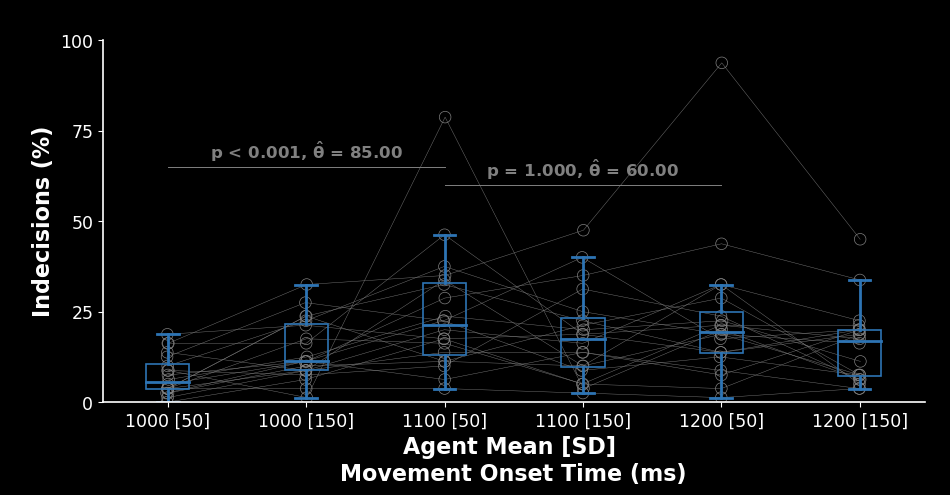

In [185]:
metric = group.player_perc_indecisions 

w,h = 12,6
axmain,ax = pf.make_figure_panel(figsize=(w,h),inset_size=(1.2,0.9,w-1.4,h-1.3))
xlocs = np.linspace(0,w,num=len(trial_block_titles))
ylocs = np.arange(0,125,25)

bw = 0.75
pf.multi_boxplot(ax,metric,xlocs=xlocs,box_width = bw,colors = wheel.seth_blue)
dv.jitter_array(ax=ax,x_positions=xlocs,data_list=metric.T, noise_scale=0.01, include_mean = False, circle_size=70)
dv.stat_annotation(ax,xlocs[0],xlocs[2],65,p_val=pvals['02'],cles=cles['02'],fontsize=12,h=1)
dv.stat_annotation(ax,xlocs[2],xlocs[4],60,p_val=pvals['24'],cles=cles['24'],fontsize=12,h=1)
ax.set_xlim(min(xlocs)-1.5*bw,max(xlocs)+1.5*bw), ax.set_ylim(min(ylocs),max(ylocs))

ax.set_xticks(xlocs),ax.set_yticks(ylocs)
ax.set_xticklabels(trial_block_titles)
ax.set_ylim(0,100)
ax.set_xlabel('Agent Mean [SD] \nMovement Onset Time (ms)')
ax.set_ylabel('Indecisions (%)')
if save:
    plt.savefig(SAVE_PATH+'wins', dpi = 400, transparent = True)

axmain.set_axis_off()

plt.show()

Boxplot just 50ms

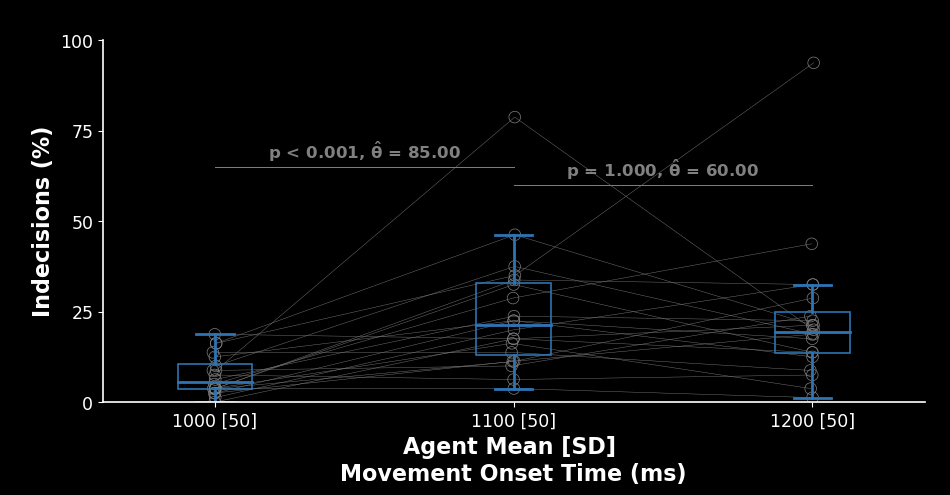

In [186]:
metric = group.player_perc_indecisions[:,::2] 

w,h = 12,6
axmain,ax = pf.make_figure_panel(figsize=(w,h),inset_size=(1.2,0.9,w-1.4,h-1.3))
xlocs = np.linspace(0,w/2,num=len(trial_block_titles)//2)
ylocs = np.arange(0,125,25)

bw = 0.75
pf.multi_boxplot(ax,metric,xlocs=xlocs,box_width = bw,colors = wheel.seth_blue)
dv.jitter_array(ax=ax,x_positions=xlocs,data_list=metric.T, noise_scale=0.01, include_mean = False, circle_size=70)
dv.stat_annotation(ax,xlocs[0],xlocs[1],65,p_val=pvals['02'],cles=cles['02'],fontsize=12,h=1)
dv.stat_annotation(ax,xlocs[1],xlocs[2],60,p_val=pvals['24'],cles=cles['24'],fontsize=12,h=1)
ax.set_xlim(min(xlocs)-1.5*bw,max(xlocs)+1.5*bw), ax.set_ylim(min(ylocs),max(ylocs))

ax.set_xticks(xlocs),ax.set_yticks(ylocs)
ax.set_xticklabels(trial_block_titles[::2])
ax.set_ylim(0,100)
ax.set_xlabel('Agent Mean [SD] \nMovement Onset Time (ms)')
ax.set_ylabel('Indecisions (%)')
if save:
    plt.savefig(SAVE_PATH+'wins', dpi = 400, transparent = True)

axmain.set_axis_off()

plt.show()

## Correct Decisions

### Stats

Anova

In [187]:
anova = pg.rm_anova(data=df, dv='Correct Decisions', within=['Condition Mean','Condition SD'], subject='Subject', detailed=True)
# dill.dump(anova,open(save_path+'\\median_leave_time_anova_df.pkl','wb')) 
anova

,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,ng2,eps
0,Condition Mean,1.456273,2,38,0.728137,63.398219,7.832127e-13,3.543290e-10,0.477982,0.75166
1,Condition SD,0.055255,1,19,0.055255,10.454385,4.374570e-03,4.374570e-03,0.033576,1.00000
2,Condition Mean * Condition SD,0.002299,2,38,0.001150,0.194455,8.240973e-01,7.825386e-01,0.001444,0.82528


Follow up Comparisons (don't collapse)

In [188]:
pvals,cles = sf.pairwise_bootstrap(group.phat_correct)
print(pvals)
print(cles)

{'01': 0.27784200000000003, '02': 0.172304, '03': 8.400000000000001e-05, '04': 0.0, '05': 0.0, '12': 0.278964, '13': 0.000876, '14': 0.0, '15': 0.0, '23': 0.278964, '24': 0.0, '25': 0.0, '34': 0.0, '35': 0.0, '45': 0.00328}
{'01': 57.49999999999999, '02': 85.0, '03': 80.0, '04': 95.0, '05': 95.0, '12': 62.5, '13': 77.5, '14': 95.0, '15': 100.0, '23': 65.0, '24': 90.0, '25': 100.0, '34': 95.0, '35': 100.0, '45': 70.0}


 Boxplot

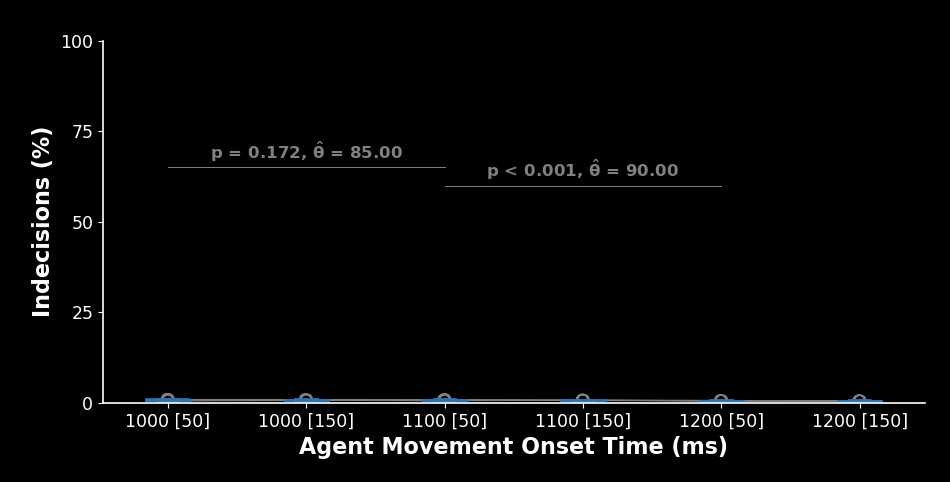

In [189]:
metric = group.phat_correct 

w,h = 12,6
axmain,ax = pf.make_figure_panel(figsize=(w,h),inset_size=(1.2,0.9,w-1.4,h-1.3))
xlocs = np.linspace(0,w,num=len(trial_block_titles))
ylocs = np.arange(0,125,25)

bw = 0.75
pf.multi_boxplot(ax,metric,xlocs=xlocs,box_width = bw,colors = wheel.seth_blue)
dv.jitter_array(ax=ax,x_positions=xlocs,data_list=metric.T, noise_scale=0.01, include_mean = False, circle_size=70)
dv.stat_annotation(ax,xlocs[0],xlocs[2],65,p_val=pvals['02'],cles=cles['02'],fontsize=12,h=1)
dv.stat_annotation(ax,xlocs[2],xlocs[4],60,p_val=pvals['24'],cles=cles['24'],fontsize=12,h=1)
ax.set_xlim(min(xlocs)-1.5*bw,max(xlocs)+1.5*bw), ax.set_ylim(min(ylocs),max(ylocs))

ax.set_xticks(xlocs),ax.set_yticks(ylocs)
ax.set_xticklabels(trial_block_titles)
ax.set_ylim(0,100)
ax.set_xlabel('Agent Movement Onset Time (ms)')
ax.set_ylabel('Indecisions (%)')
if save:
    plt.savefig(SAVE_PATH+'wins', dpi = 400, transparent = True)

axmain.set_axis_off()

plt.show()

### Stats

### Boxplot